In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
ds = pd.read_csv("temperatures.csv")

In [3]:
ds.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57


In [4]:
ds.tail()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
112,2013,24.56,26.59,30.62,32.66,34.46,32.44,31.07,30.76,31.04,30.27,27.83,25.37,29.81,25.58,32.58,31.33,27.83
113,2014,23.83,25.97,28.95,32.74,33.77,34.15,31.85,31.32,30.68,30.29,28.05,25.08,29.72,24.90,31.82,32.00,27.81
114,2015,24.58,26.89,29.07,31.87,34.09,32.48,31.88,31.52,31.55,31.04,28.10,25.67,29.90,25.74,31.68,31.87,28.27
115,2016,26.94,29.72,32.62,35.38,35.72,34.03,31.64,31.79,31.66,31.98,30.11,28.01,31.63,28.33,34.57,32.28,30.03
116,2017,26.45,29.46,31.60,34.95,35.84,33.82,31.88,31.72,32.22,32.29,29.60,27.18,31.42,27.95,34.13,32.41,29.69


In [5]:
ds

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2013,24.56,26.59,30.62,32.66,34.46,32.44,31.07,30.76,31.04,30.27,27.83,25.37,29.81,25.58,32.58,31.33,27.83
113,2014,23.83,25.97,28.95,32.74,33.77,34.15,31.85,31.32,30.68,30.29,28.05,25.08,29.72,24.90,31.82,32.00,27.81
114,2015,24.58,26.89,29.07,31.87,34.09,32.48,31.88,31.52,31.55,31.04,28.10,25.67,29.90,25.74,31.68,31.87,28.27
115,2016,26.94,29.72,32.62,35.38,35.72,34.03,31.64,31.79,31.66,31.98,30.11,28.01,31.63,28.33,34.57,32.28,30.03


In [6]:
ds.shape

(117, 18)

In [7]:
ds.isnull().sum()

YEAR       0
JAN        0
FEB        0
MAR        0
APR        0
MAY        0
JUN        0
JUL        0
AUG        0
SEP        0
OCT        0
NOV        0
DEC        0
ANNUAL     0
JAN-FEB    0
MAR-MAY    0
JUN-SEP    0
OCT-DEC    0
dtype: int64

In [8]:
X = ds["YEAR"]

In [9]:
X

0      1901
1      1902
2      1903
3      1904
4      1905
       ... 
112    2013
113    2014
114    2015
115    2016
116    2017
Name: YEAR, Length: 117, dtype: int64

In [10]:
X = X.values

In [11]:
X.shape

(117,)

In [12]:
X.reshape(len(X),1)

array([[1901],
       [1902],
       [1903],
       [1904],
       [1905],
       [1906],
       [1907],
       [1908],
       [1909],
       [1910],
       [1911],
       [1912],
       [1913],
       [1914],
       [1915],
       [1916],
       [1917],
       [1918],
       [1919],
       [1920],
       [1921],
       [1922],
       [1923],
       [1924],
       [1925],
       [1926],
       [1927],
       [1928],
       [1929],
       [1930],
       [1931],
       [1932],
       [1933],
       [1934],
       [1935],
       [1936],
       [1937],
       [1938],
       [1939],
       [1940],
       [1941],
       [1942],
       [1943],
       [1944],
       [1945],
       [1946],
       [1947],
       [1948],
       [1949],
       [1950],
       [1951],
       [1952],
       [1953],
       [1954],
       [1955],
       [1956],
       [1957],
       [1958],
       [1959],
       [1960],
       [1961],
       [1962],
       [1963],
       [1964],
       [1965],
       [1966],
       [19

In [13]:
Y = ds["ANNUAL"]

In [14]:
Y

0      28.96
1      29.22
2      28.47
3      28.49
4      28.30
       ...  
112    29.81
113    29.72
114    29.90
115    31.63
116    31.42
Name: ANNUAL, Length: 117, dtype: float64

In [15]:
Y=Y.values

In [16]:
Y.shape

(117,)

In [17]:
Y.reshape(len(Y),1)

array([[28.96],
       [29.22],
       [28.47],
       [28.49],
       [28.3 ],
       [28.73],
       [28.65],
       [28.83],
       [28.38],
       [28.53],
       [28.62],
       [28.95],
       [28.67],
       [28.66],
       [28.94],
       [28.82],
       [28.11],
       [28.66],
       [28.66],
       [28.76],
       [28.86],
       [28.8 ],
       [28.74],
       [28.8 ],
       [28.67],
       [28.7 ],
       [28.59],
       [28.98],
       [28.76],
       [28.65],
       [29.15],
       [29.09],
       [28.49],
       [29.03],
       [28.76],
       [28.71],
       [28.7 ],
       [28.7 ],
       [28.85],
       [28.88],
       [29.46],
       [28.98],
       [28.8 ],
       [28.89],
       [28.97],
       [29.37],
       [28.84],
       [28.73],
       [28.89],
       [28.47],
       [29.09],
       [29.16],
       [29.43],
       [28.92],
       [28.76],
       [28.63],
       [28.64],
       [29.34],
       [29.02],
       [29.31],
       [28.72],
       [28.89],
       [

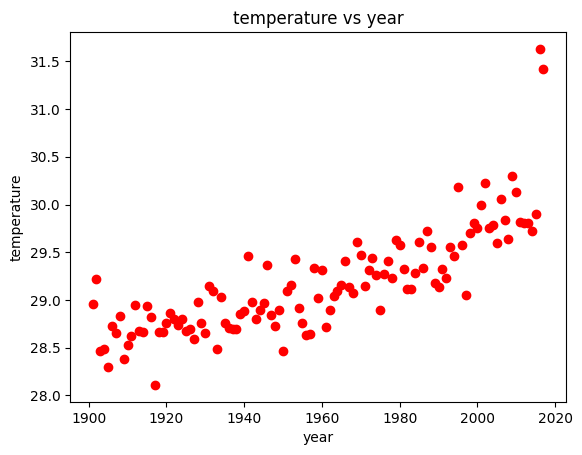

In [18]:
plt.scatter(X,Y,color="red")
plt.title("temperature vs year")
plt.xlabel("year")
plt.ylabel("temperature")
plt.show()

In [19]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.25,random_state = 0)

In [20]:
print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)

(87,)
(30,)
(87,)
(30,)


In [21]:
Xtrain = Xtrain.reshape(len(Xtrain),1)
Xtest = Xtest.reshape(len(Xtest),1)
Ytrain = Ytrain.reshape(len(Ytrain),1)
Ytest = Ytest.reshape(len(Ytest),1)

In [22]:
regressor = LinearRegression()

In [23]:
regressor.fit(Xtrain,Ytrain)

LinearRegression()

In [24]:
Ypred = regressor.predict(Xtest)

In [25]:
Ypred

array([[28.60607504],
       [29.18211651],
       [29.60533066],
       [29.55830686],
       [28.57080719],
       [29.49952712],
       [28.79417021],
       [29.80518178],
       [28.74714642],
       [29.59357471],
       [29.67586635],
       [28.51202745],
       [29.07631298],
       [28.77065832],
       [29.85220557],
       [29.21738436],
       [29.58181876],
       [29.35845574],
       [29.20562841],
       [29.34669979],
       [28.67661073],
       [29.75815799],
       [28.64134288],
       [28.99402134],
       [29.72289014],
       [28.87646185],
       [28.84119401],
       [29.14684867],
       [29.05280108],
       [28.58256314]])

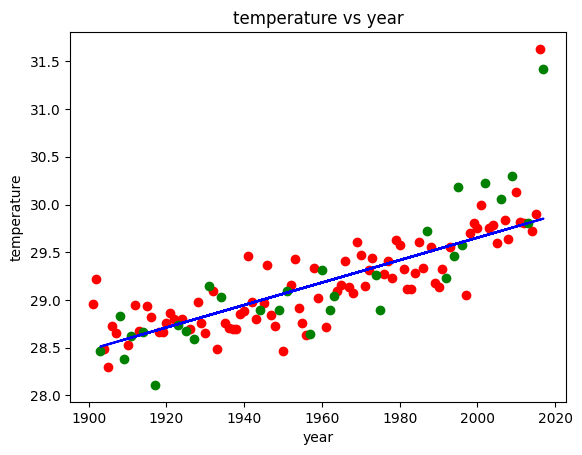

In [26]:
plt.scatter(Xtrain,Ytrain,color="red")
plt.scatter(Xtest,Ytest,color="green")
plt.plot(Xtest,Ypred,color = "blue")
plt.title("temperature vs year")
plt.xlabel("year")
plt.ylabel("temperature")
plt.show()

In [27]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [28]:
print(r2_score(Ytest,Ypred))
print(mean_absolute_error(Ytest,Ypred))
print(mean_squared_error(Ytest,Ypred))

0.6593855137850329
0.27095859373514986
0.16530868767622497


In [29]:
regressor.coef_

array([[0.01175595]])

In [31]:
regressor.intercept_

array([6.14045756])